# About The Dataset

### **Definition Of Some Columns**

*   **Tenure :**  *Duration in months* for which a customer has been using the company's products or services

*   **Usage Frequency :** Number of times that the customer has used the company’s services in the last month

*   **Support Calls :** Number of calls that the customer has made to the customer support in the last month

*   **Payment Delay :** Number of days that the customer has delayed their payment in the last month

*   **Subscription Type :** Type of subscription the customer has choosen


*   **Contract Length:**  Duration of the contract that the customer has signed with the company

*   **Total Spend :** Total amount of money the customer has spent on the company's products or services


*   **Last Interaction :** Last Interaction: Number of days since the last interaction that the customer had with the company


*   **Churn :** Binary label indicating whether a customer has churned (1) or not (0)










## **Importing Needed libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

## **Importing Data**

In [2]:
dftrain=pd.read_csv('E:\\Courses\\6 - Uneeq Intern\\Customer Churn Project\\Customer Churn\\customer_churn_dataset-training-master.csv')
dftrain

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
dftest=pd.read_csv('E:\\Courses\\6 - Uneeq Intern\\Customer Churn Project\\Customer Churn\\customer_churn_dataset-testing-master.csv')
dftest

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


# **Exploratory Data Analysis (EDA)**

In [4]:
df=pd.concat([dftrain,dftest])
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [5]:
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [6]:
df.shape

(505207, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         505206 non-null  float64
 1   age                505206 non-null  float64
 2   gender             505206 non-null  object 
 3   tenure             505206 non-null  float64
 4   usage_frequency    505206 non-null  float64
 5   support_calls      505206 non-null  float64
 6   payment_delay      505206 non-null  float64
 7   subscription_type  505206 non-null  object 
 8   contract_length    505206 non-null  object 
 9   total_spend        505206 non-null  float64
 10  last_interaction   505206 non-null  float64
 11  churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [8]:
df.isnull().sum()

customerid           1
age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

customerid           0
age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
churn                0
dtype: int64

In [10]:
df.drop(columns=['customerid'],inplace=True)

In [11]:
df.describe()

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [12]:
df.describe(include='object')

,gender,subscription_type,contract_length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [13]:
float_cols = df.select_dtypes(include=['float64']).columns

for col in float_cols:
    df[col] = df[col].round().astype('Int64')

print(df[float_cols].dtypes)


age                 Int64
tenure              Int64
usage_frequency     Int64
support_calls       Int64
payment_delay       Int64
total_spend         Int64
last_interaction    Int64
churn               Int64
dtype: object


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   age                505206 non-null  Int64 
 1   gender             505206 non-null  object
 2   tenure             505206 non-null  Int64 
 3   usage_frequency    505206 non-null  Int64 
 4   support_calls      505206 non-null  Int64 
 5   payment_delay      505206 non-null  Int64 
 6   subscription_type  505206 non-null  object
 7   contract_length    505206 non-null  object
 8   total_spend        505206 non-null  Int64 
 9   last_interaction   505206 non-null  Int64 
 10  churn              505206 non-null  Int64 
dtypes: Int64(8), object(3)
memory usage: 50.1+ MB


In [15]:
numerical=df.select_dtypes(include=['int64']).columns

categorical=df.select_dtypes(include=['object']).columns

In [16]:
numerical

Index(['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay',
       'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [17]:
categorical

Index(['gender', 'subscription_type', 'contract_length'], dtype='object')

In [18]:
numerical=numerical.drop('churn')

In [19]:
df[categorical].nunique()

gender               2
subscription_type    3
contract_length      3
dtype: int64

In [20]:
#Churn
df.churn.value_counts()

churn
1    280492
0    224714
Name: count, dtype: Int64

In [21]:
df.churn.value_counts(normalize=True) #small imbalance

churn
1    0.555203
0    0.444797
Name: proportion, dtype: Float64

<Axes: ylabel='count'>

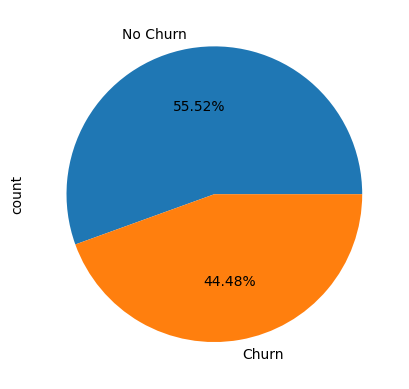

In [22]:
df.churn.value_counts().plot(kind='pie',labels=['No Churn','Churn'],autopct='%.2f%%')

In [23]:
global_mean=df.churn.mean().round(2)
global_mean

0.56

There are many customer Churn

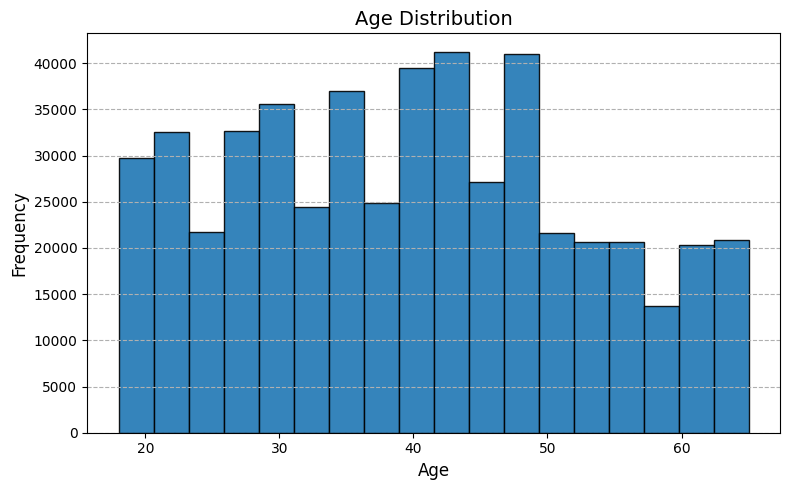

In [24]:
#Age
plt.figure(figsize=(8,5))

df['age'].plot(kind='hist',bins=18,edgecolor='black',alpha=0.9)

plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [25]:
df.age.describe()

count     505206.0
mean     39.704172
std      12.670577
min           18.0
25%           29.0
50%           40.0
75%           49.0
max           65.0
Name: age, dtype: Float64

In [26]:
df.age.median() #median

40.0

In [27]:
df.age.skew() #skewness

0.14431806609177258

In [28]:
df.age.corr(df.churn) #correlation

0.19122405196207434

- **Most** **Users** are from age **18** to **50** 
- **min** **age** is **18** , max age is **65**
- **mean** of ages is **39.7**
- **median** is **40**
- we have a **skewness** in this column



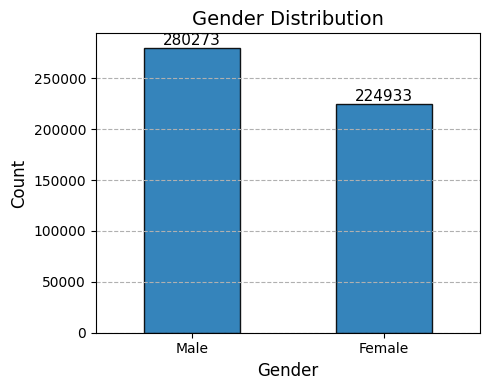

In [29]:
#Gender
plt.figure(figsize=(5,4))
fig=df.gender.value_counts().plot(kind='bar',edgecolor='black',alpha=0.9)

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in fig.patches:
    fig.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [30]:
gender_churn=df.groupby('gender')['churn'].mean()
gender_churn

gender
Female    0.648944
Male      0.479971
Name: churn, dtype: Float64

In [31]:
gender_risk=gender_churn/global_mean
gender_risk

gender
Female    1.158829
Male      0.857092
Name: churn, dtype: Float64

## Categorical Feature Importance

In [32]:
from IPython.display import display
feature_importance=[]

for col in categorical:
    
    feature_importance.append(df.groupby(col)["churn"].mean()/global_mean)

display(feature_importance) #feature_importance    

[gender
 Female    1.158829
 Male      0.857092
 Name: churn, dtype: Float64,
 subscription_type
 Basic       1.015839
 Premium     0.977718
 Standard    0.981583
 Name: churn, dtype: Float64,
 contract_length
 Annual       0.823059
 Monthly      1.610648
 Quarterly    0.818158
 Name: churn, dtype: Float64]

### Insights
- **So we can see that is when the user is female is more chance to be churn**
- **But The subscription type is not an efective feature**
- **The contract length is the most important feature**

In [33]:
global_mean

0.56

In [34]:
df.gender.describe()

count     505206
unique         2
top         Male
freq      280273
Name: gender, dtype: object

In [35]:
age_churn=df.groupby('gender')['churn'].mean()
age_churn

gender
Female    0.648944
Male      0.479971
Name: churn, dtype: Float64

- **Most Users Are Male**

In [36]:
categorical

Index(['gender', 'subscription_type', 'contract_length'], dtype='object')

## Numerical Feature Importance

In [37]:
from sklearn.ensemble import RandomForestClassifier

X = df.select_dtypes(include=['int64', 'float64']).drop("churn", axis=1)
y = df["churn"]

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42
)

model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)


support_calls       0.370586
total_spend         0.240636
payment_delay       0.197107
age                 0.160247
last_interaction    0.015222
tenure              0.010474
usage_frequency     0.005728
dtype: float64

In [38]:
df.total_spend.corr(df.churn)

-0.3696823669905712

In [39]:
#Tenure
df.tenure.describe()

count     505206.0
mean     31.350435
std      17.237482
min            1.0
25%           16.0
50%           32.0
75%           46.0
max           60.0
Name: tenure, dtype: Float64

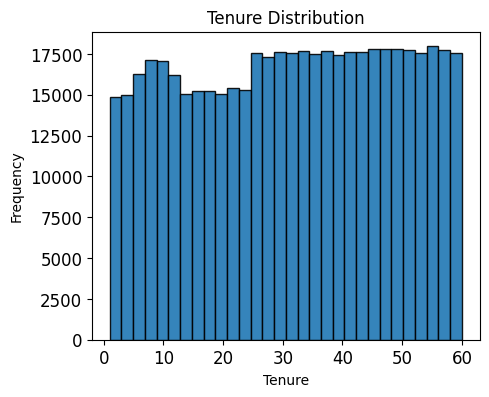

In [40]:
plt.figure(figsize=(5,4))
fig=df.tenure.plot(kind='hist',xlabel='Tenure',edgecolor='black',alpha=0.9,fontsize=12,bins=30,title='Tenure Distribution')

In [41]:
#Usage Frequency
df['usage_frequency'].describe()

count     505206.0
mean     15.714825
std       8.619323
min            1.0
25%            8.0
50%           16.0
75%           23.0
max           30.0
Name: usage_frequency, dtype: Float64

<Axes: >

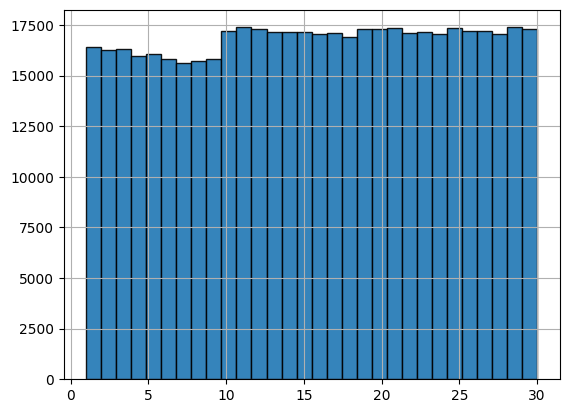

In [42]:
df['usage_frequency'].hist(bins=30,edgecolor='black',alpha=0.9)

In [43]:
#Support Calls
df['support_calls'].describe()

count    505206.0
mean     3.833317
std      3.133603
min           0.0
25%           1.0
50%           3.0
75%           6.0
max          10.0
Name: support_calls, dtype: Float64

<Axes: >

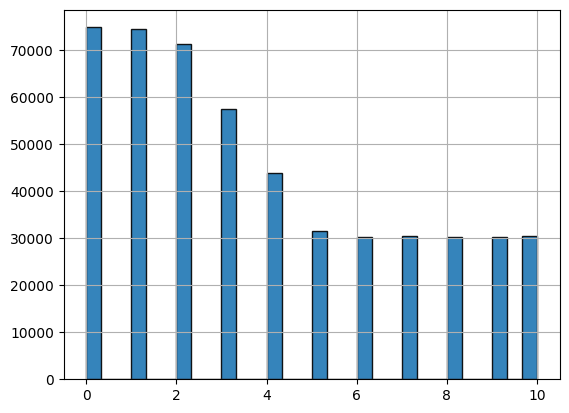

In [44]:
df['support_calls'].hist(bins=30,edgecolor='black',alpha=0.9)

<Axes: xlabel='support_calls'>

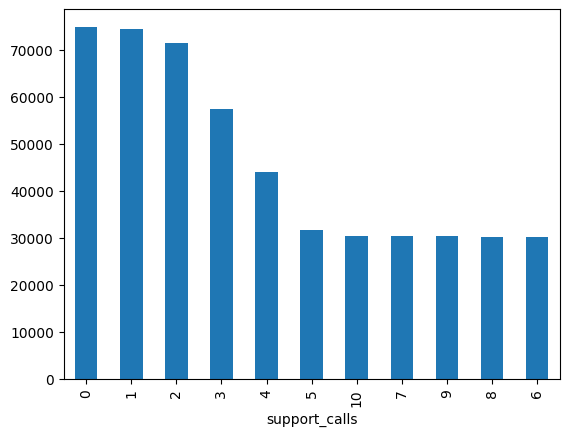

In [45]:
df['support_calls'].value_counts().plot(kind='bar')

<Axes: xlabel='support_calls', ylabel='count'>

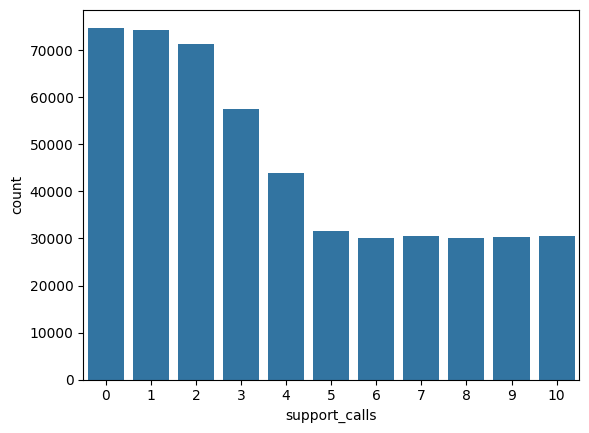

In [46]:
sns.countplot(x='support_calls',data=df)

In [47]:
#Payment Delay
df['payment_delay'].describe()

count     505206.0
mean     13.496843
std       8.451187
min            0.0
25%            6.0
50%           13.0
75%           20.0
max           30.0
Name: payment_delay, dtype: Float64

<Axes: ylabel='Frequency'>

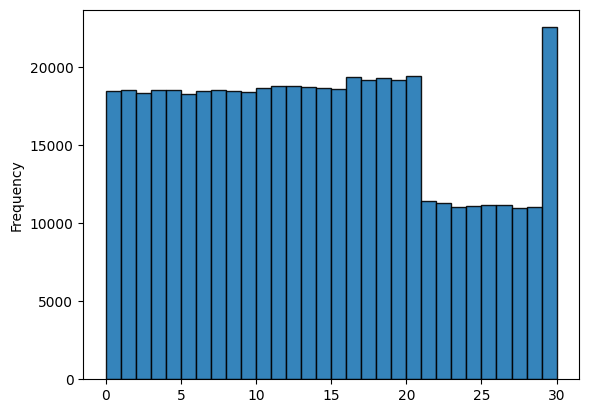

In [48]:
df.payment_delay.plot(kind='hist',bins=30,edgecolor='black',alpha=0.9)

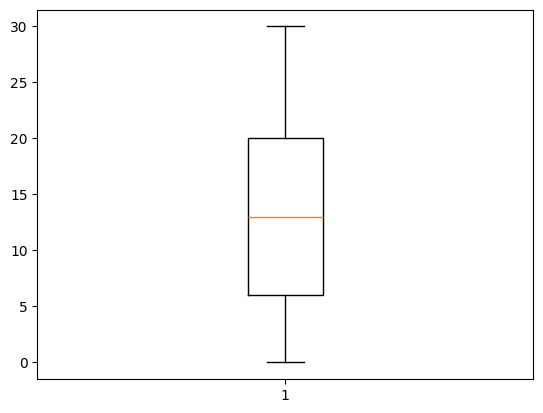

In [49]:
plt.boxplot(df.payment_delay)
plt.show()

In [50]:
df.payment_delay.skew()

0.1996997220935514

In [52]:
new_df=df.drop(columns=['subscription_type','tenure','usage_frequency'],axis=1)
new_df.head()

,age,gender,support_calls,payment_delay,contract_length,total_spend,last_interaction,churn
0,30,Female,5,18,Annual,932,17,1
1,65,Female,10,8,Monthly,557,6,1
2,55,Female,6,18,Quarterly,185,3,1
3,58,Male,7,7,Monthly,396,29,1
4,23,Male,5,8,Monthly,617,20,1


In [53]:
new_df['encoded_gender']=new_df.gender.map({'Male':1,'Female':0})
new_df.head()

,age,gender,support_calls,payment_delay,contract_length,total_spend,last_interaction,churn,encoded_gender
0,30,Female,5,18,Annual,932,17,1,0
1,65,Female,10,8,Monthly,557,6,1,0
2,55,Female,6,18,Quarterly,185,3,1,0
3,58,Male,7,7,Monthly,396,29,1,1
4,23,Male,5,8,Monthly,617,20,1,1


In [55]:
new_df=pd.get_dummies(new_df,columns=['contract_length'],drop_first=True,dtype=int)  
new_df

,age,gender,support_calls,payment_delay,total_spend,last_interaction,churn,encoded_gender,contract_length_Monthly,contract_length_Quarterly
0,30,Female,5,18,932,17,1,0,0,0
1,65,Female,10,8,557,6,1,0,1,0
2,55,Female,6,18,185,3,1,0,0,1
3,58,Male,7,7,396,29,1,1,1,0
4,23,Male,5,8,617,20,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,6,21,947,14,1,0,0,1
64370,37,Male,5,22,923,9,1,1,0,0
64371,25,Male,8,30,327,20,1,1,1,0
64372,50,Female,7,22,540,13,1,0,1,0


In [56]:
new_df=new_df.drop(columns=['gender'],axis=1)
new_df

,age,support_calls,payment_delay,total_spend,last_interaction,churn,encoded_gender,contract_length_Monthly,contract_length_Quarterly
0,30,5,18,932,17,1,0,0,0
1,65,10,8,557,6,1,0,1,0
2,55,6,18,185,3,1,0,0,1
3,58,7,7,396,29,1,1,1,0
4,23,5,8,617,20,1,1,1,0
...,...,...,...,...,...,...,...,...,...
64369,45,6,21,947,14,1,0,0,1
64370,37,5,22,923,9,1,1,0,0
64371,25,8,30,327,20,1,1,1,0
64372,50,7,22,540,13,1,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
X = new_df.drop('churn', axis=1)
y = new_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404164, 8), (101042, 8), (404164,), (101042,))

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [59]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38005  6976]
 [ 8583 47478]]
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83     44981
         1.0       0.87      0.85      0.86     56061

    accuracy                           0.85    101042
   macro avg       0.84      0.85      0.84    101042
weighted avg       0.85      0.85      0.85    101042

